<a href="https://colab.research.google.com/github/nalinis07/APT_Ref_Copy_Links/blob/MASTER/AT_Lesson_87_Reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 87: Support Vector Machines - MNIST Digits Classification II

**WARNING:** The reference notebook is meant **ONLY** for a teacher. Please **DO NOT** share it with any student.

The contents of the reference notebook are meant only to prepare a teacher for a class. To conduct the class, use the class copy of the reference notebook. The link and the instructions for the same are provided in the **Notes To The Teacher** section.


|Particulars|Description|
|-|-|
|**Topic**|Support Vector Machines - MNIST Digits Classification II|
|||
|**Class Description**|A student will learn to classify handwritten digits images of the MNIST dataset using linear kernel SVM|
|||
|**Class**|C87|
|||
|**Class Time**|50 minutes|
|||
|**Goal**|Normalise each pixel value of a sample image of a digit|
||Build an SVC module using the linear kernel to classify digits|
|||
|**Teacher Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|
|||
|**Student Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|

---

### Warm-up Quiz

```
TEACHER
I have an exciting quiz question for you! Are you ready to answer this question?

EXPECTED STUDENT RESPONSE
Yes.
```

**Instructions for the Teacher:**
- Please click on the "Quiz Time" button on the bottom right corner of your screen to start the In-Class Quiz. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/quiz-time.png' width = 150>

- A quiz will be visible to both you and the student. Encourage the student to answer the quiz question.

- The student may choose the wrong option, help the student to think correctly about the question and then answer again.

- After the student selects the correct option, the "End Quiz" button will start appearing on your screen. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/end-quiz.png' width = 150>  

- Click the "End quiz" button to close the quiz pop-up and continue the class.
  
- Do not spend more than 2 minutes on this quiz.

---

### Teacher-Student Activities

In the previous classes, you learn to visualise a grayscale image using its pixel values. In this class, you will learn the following:

1. Normalise the pixel value of an image.
2. Build an SVM model using the linear kernel to classify images.

Let's quickly go through the activities covered in the previous class and begin this class from **Activity 1: Feature Scaling or Normalisation** section.

**Data Description**

For this problem, we will use the MNIST data which is a huge dataset containing handwritten digits. We don't have actual images rather we have its pixels.

Since each image has $28 \times 28$ pixels and each pixel form a feature. There are 784 features. These features are recorded in CSV files. One for the training a model and another for testing the model. The **pixel values** of each digit (image) comprise the features, and the actual number between 0 and 9 is the label.

Here are the examples of the images of the handwritten used in the dataset.

<center><img src = "https://s3-whjr-v2-prod-bucket.whjr.online/359b49aa-47db-46f6-b4e7-7b3d8dc99f46.png" width = 700></center>




---

#### Loading Data

Let's load both the training and the test datasets. Here are the links to the required two CSV files.

1. **Train set:** https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/mnist-digits-recognition/train.csv

2. **Test set:** https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/mnist-digits-recognition/test.csv

**Dataset credits:** http://yann.lecun.com/exdb/mnist/

In [ ]:
# Import the libraries and load the CSV files.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_csv_path = "https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/mnist-digits-recognition/train.csv"
test_csv_path = "https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/mnist-digits-recognition/test.csv"
train_df = pd.read_csv(train_csv_path) #reading the csv files using pandas
test_df = pd.read_csv(test_csv_path)

Now, get the information on both data frames.

In [ ]:
# Get the information on the train dataset.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


There are 42000 rows and 785 columns in the training dataset.

In [ ]:
# Get the information on the test dataset.
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


There are 28000 rows and 784 columns in the test dataset. This means we don't have the labels column for the test set.

In [ ]:
# Print the first and last five columns of both the test and train datasets.
print(f"Test set:\n{'-' * 100}\nFirst five columns -> {list(test_df.columns[:5])}\nLast five columns -> {list(test_df.columns[-5:])}\n")
print(f"Train set:\n{'-' * 100}\nFive five columns -> {list(train_df.columns[:5])}\nLast five columns -> {list(train_df.columns[-5:])}")

Test set:
----------------------------------------------------------------------------------------------------
First five columns -> ['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4']
Last five columns -> ['pixel779', 'pixel780', 'pixel781', 'pixel782', 'pixel783']

Train set:
----------------------------------------------------------------------------------------------------
Five five columns -> ['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3']
Last five columns -> ['pixel779', 'pixel780', 'pixel781', 'pixel782', 'pixel783']


As you can see, the train set has the `label` column but the test set doesn't.

Now, let's print the first five rows of the data frame containing the train set.

In [ ]:
# Print the first ten rows of the data frame containing the train set.
train_df.head(10) # printing first five columns of train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


As you can see:

- The first row contains the pixel values of the image of the handwritten digit $1$.

- Similarly, the second row contains the pixel values of the image of the handwritten digit $0$.

- Similarly, the third row contains the pixel values of the image of the handwritten digit $1$.


$$\vdots$$

- The $10^{\text{th}}$ row contains the pixel values of the image of the handwritten digit $3$.

Let's print the image of the digit $4$.


---

#### The `matplotlib.pyplot.imshow()` Function

To display an image from its pixel values, you can use the `imshow()` function of the `matplotlib.pyplot` module. So, to create the image of the digit 4 from its pixel values, we will follow the steps given below:

1. Create a 1D array containing the pixel values from the training data frame for the image and store it in a variable.

2. Then reshape the above array into a 2D array having 28 rows and 28 columns.

3. Use the `imshow()` function of the `matplotlib.pyplot` module and pass the following inputs to the function:
   - The $28 \times 28$ array containing the pixel values of an image
   
   - The colour mapping value for the image. We will create a grayscale image hence, we will set the colormapping value using the parameters `cmap = 'gray', vmin = 0, vmax = 255`.

   **Note:** There are other parameters that can be passed to `imshow()` function as inputs. But for now, we will pass the above parameters only.

4. Provide the title to the image.



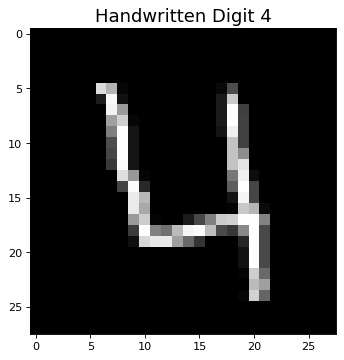

In [ ]:
# Display the image of the handwritten digit 4 from the train data frame.
four_pixels = train_df.iloc[3, 1:]
four_pixels = four_pixels.values.reshape(28, 28) # The 'values' attrtibute gets the values of the Pandas series in the form of a NumPy array.

plt.figure(figsize = (5, 5), dpi = 81)
plt.title("Handwritten Digit 4", fontsize = 16)
plt.imshow(four_pixels, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

In the above code:

- `four_pixels = train_df.iloc[3, 1:]` part gets the pixel values of the image of the digit 4 that are stored in the $4^{\text{th}}$ row of the data frame.

- `four_pixels = four_pixels.values.reshape(28, 28)` part first gets the pixel values from the Pandas series in the form of a NumPy array and then reshapes the 1D array into a 2D array having 28 rows and 28 columns.

- `plt.figure(figsize = (5, 5), dpi = 81)` part sets the figure size.

- `plt.title("Handwritten Digit 4", fontsize = 16)` part sets the title of the plot.

- `plt.imshow(four_pixels, cmap = 'gray', vmin = 0, vmax = 255)` part creates a 2D image in gray colour.

If you look at the axes of the above image, you can see that nearly the first four and last three rows are blank. Similarly, the first five and last five columns are blank which is denoted by the black colour. So let's print the rows 5 to 26 and columns 5 to 25 of the `four_pixel` NumPy array to see the pixel values of the image of the handwritten digit 4.

In [ ]:
# Print the rows 5 to 26 and columns 5 to 25 of the 'four_pixel' NumPy array to see the pixel values of the image of the handwritten digit 4.
print(four_pixels[4:-2, 5:-5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 220 179   6   0   0   0   0   0   0   0   0   9  77   0   0   0   0]
 [  0  28 247  17   0   0   0   0   0   0   0   0  27 202   0   0   0   0]
 [  0   0 242 155   0   0   0   0   0   0   0   0  27 254  63   0   0   0]
 [  0   0 160 207   6   0   0   0   0   0   0   0  27 254  65   0   0   0]
 [  0   0 127 254  21   0   0   0   0   0   0   0  20 239  65   0   0   0]
 [  0   0  77 254  21   0   0   0   0   0   0   0   0 195  65   0   0   0]
 [  0   0  70 254  21   0   0   0   0   0   0   0   0 195 142   0   0   0]
 [  0   0  56 251  21   0   0   0   0   0   0   0   0 195 227   0   0   0]
 [  0   0   0 222 153   5   0   0   0   0   0   0   0 120 240  13   0   0]
 [  0   0   0  67 251  40   0   0   0   0   0   0   0  94 255  69   0   0]
 [  0   0   0   0 234 184   0   0   0   0   0   0   0  19 245  69   0   0]
 [  0   0   0   0 234 169   0   0   0   0   0   0   0   3 199 182  10   0]
 [  0   0   0   0 154 205

From the above output, you can see the non-zero pixel values arranged in the pattern of digit 4.

**It is to be noted that the pixel values for a grayscale image range from 0 to 255.**

You can also look at the descriptive statistics for the first 10 images in the train data frame.

---


#### The `pandas.set_index()` Function

Before printing the descriptive statistics values of the first 10 images in the train data frame, let's learn the `set_index()` function of the `pandas` module. It is used to set another column or 1D array as an index of a Pandas data frame.

**Syntax:** `pandas_dataframe.set_index(keys, inplace = False)`

where

- `keys` is an existing column in a `pandas_dataframe` or a new Pandas series having the same length as the number of rows in `pandas_dataframe`.
- `inplace` is a parameter that defines whether the indices to be set temporarily (locally) or permanently (globally). `inplace = False` means set index temporarily (locally)

In [ ]:
# Set the indices of the 'train_df' data frame temporarily to the values in the 'label' column.
train_df.set_index('label', inplace = False)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


As you can see, the indices of the `train_df` are the values of the `label` column. To verify whether the change is temporary, you may print the first five rows of the `train_df` data frame again.

Now let's calculate the mean, std, min, quartiles and max values of the pixels of the first 10 images present in the `train_df` data frame.

In [ ]:
# Print descriptive statistics for the pixel values of first 10 images in the train data frame.
train_df.set_index('label').head(10).T.describe() # Setting the 'label' as index column from the data frame.

label,1,0,1,4,0,0,7,3,5,3
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,21.235969,56.899235,17.123724,19.164541,65.169643,29.414541,21.877551,30.979592,35.612245,40.267857
std,64.660241,99.211727,59.658939,57.787051,104.862304,72.981989,63.035499,70.651698,80.562012,84.928290
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,66.250000,0.000000,0.000000,131.500000,0.000000,0.000000,0.000000,0.000000,0.000000
max,255.000000,255.000000,255.000000,255.000000,254.000000,255.000000,255.000000,255.000000,255.000000,255.000000


As you can see, the pixel values for a grayscale image goes from 0 to 255.

Now, to practice the usage of the `imshow()` function, let's create an image of another handwritten digit, say $6$ from the pixel values of its image. For this, first, you will have to get the rows that contain the pixel values of the images of $6$.


In [ ]:
# Create a data frame from the training data frame that contain the pixel values of the images of the digit 6.
six_pixels_train_df = train_df.loc[train_df['label'] == 6, :]
six_pixels_train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
21,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
72,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41921,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41927,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41967,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41993,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now, from the above data frame, let's create an image of the first instance of the image of digit $6$. Its index is 21.

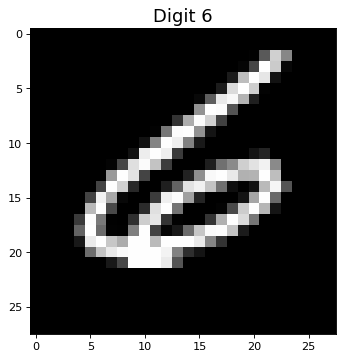

In [ ]:
# Create an image from the pixel values of the image of the digit 6 that are stored in row 21.
six_pixels = train_df.iloc[21, 1:]
six_pixels = six_pixels.values.reshape(28, 28)

plt.figure(figsize = (5, 5), dpi = 81)
plt.title("Digit 6", fontsize = 16)
plt.imshow(six_pixels, cmap = "gray", vmin = 0, vmax = 255)
plt.show()

Now, let's print the part of the array containing the pixel values of the above image such that their arrangement resembles the digit 6.

In [ ]:
# S3.8: Print the rows 2 to 22 and columns 5 to 21 of the 'six_pixels' array.
print(six_pixels[2:23, 5:22])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2  89]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   5  70 254]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  27 189 254 230]
 [  0   0   0   0   0   0   0   0   0   0   0   0  28 219 255 206   3]
 [  0   0   0   0   0   0   0   0   0   0   8  94 233 248 179  31   0]
 [  0   0   0   0   0   0   0   0   0   0 146 254 251  84   0   0   0]
 [  0   0   0   0   0   0   0   0  51 173 252 209  65   0   0   0   0]
 [  0   0   0   0   0   0   2 119 252 254 146  20   0   0   0   0   0]
 [  0   0   0   0   0  18 131 254 239 130  25   0   0   0   0   0   0]
 [  0   0   0   0  17 237 254 239  58   0   0   0   0   0   0  20  36]
 [  0   0   4  70 223 251 196  61   0   0   0  30 112 138 207 226 242]
 [  0   0 153 254 228  68   0   0   0  34 143 249 254 233 177 179 254]
 [  0  67 253 208  40   0   0  31  99 226 241 195 112  14   0  18 186]
 [ 67 241 168   8   0   0  60 239 253 161  37   0   0   0  20 165 254]
 [185 

Now, for a machine learning algorithm (in this case, SVM), to correctly identify an image for a digit, it has to figure out the arrangement of pixel values for a digit on a 2D grid (in this case, $28 \times 28$ grid).

Knowing this, we can now build a machine learning model (in this case, SVM) to classify the images of different handwritten digits.


---

#### Check for Data Imbalance

Before building a classification model, let's check whether the training dataset is imbalanced or not.

In [ ]:
# Find out the counts of records for each digit in the training dataset.
train_df['label'].value_counts(dropna = False, normalize = True) * 100

1    11.152381
7    10.478571
3    10.359524
9     9.971429
2     9.945238
6     9.850000
0     9.838095
4     9.695238
8     9.673810
5     9.035714
Name: label, dtype: float64

**Note:**

1. The `dropna = False` parameter counts the number of `NA` or `null` values if they are present in a Pandas series.

2. The `normalize = True` parameter calculates the count of a value as the fraction of the total number of records.

From the count of labels, we can see that the training dataset is balanced. Hence, we can now proceed to build a classification model.

---

#### Activity 1: Feature Scaling or Normalisation

Now that we have ensured that there is no data imbalance, let's scale down the pixel values of each image because the support vector machines is sensitive to the numeric data. Also, in the case of large values, the time taken to train an SVM model will be high.  

So let's divide each pixel value for each image by 255 (the greatest pixel value for a grayscale image) to reduce the values between 0 and 1.



In [ ]:
# S1.1: Create features and target data frames and divide each pixel for each image by 255.0
features_train = train_df.iloc[:, 1:] / 255.0
target_train_actual = train_df['label']

features_train.set_index(keys = target_train_actual, inplace = False).T.describe()

label,1,0,1,4,0,0,7,3,5,3,8,9,1,3,3,1,2,0,7,5,8,6,2,0,2,3,6,9,9,7,8,9,4,9,2,1,3,1,1,4,...,1,8,9,2,8,2,4,6,0,9,2,3,4,4,3,9,2,4,4,4,7,2,8,7,3,3,0,5,0,5,3,1,9,6,4,0,1,7,6,9
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,...,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,0.083278,0.223134,0.067152,0.075155,0.255567,0.115351,0.085794,0.121489,0.139656,0.157913,0.213080,0.130147,0.061750,0.178621,0.169973,0.044438,0.206578,0.166156,0.067277,0.222244,0.121759,0.134109,0.143918,0.228666,0.134634,0.134039,0.137355,0.110434,0.140971,0.136530,0.127351,0.093778,0.138450,0.135219,0.133208,0.059764,0.116477,0.065866,0.065911,0.106868,...,0.093207,0.113210,0.089851,0.139651,0.142642,0.183418,0.074915,0.153681,0.246619,0.092977,0.138766,0.134954,0.132163,0.089581,0.147419,0.127841,0.138620,0.108208,0.091702,0.103822,0.108633,0.139681,0.106933,0.094158,0.191887,0.104077,0.149645,0.144578,0.167317,0.154382,0.107198,0.108373,0.143467,0.172814,0.160399,0.146609,0.067102,0.157583,0.131958,0.090926
std,0.253570,0.389066,0.233957,0.226616,0.411225,0.286204,0.247198,0.277065,0.315929,0.333052,0.378785,0.305275,0.218173,0.360048,0.340278,0.180772,0.379890,0.340775,0.221603,0.385132,0.290606,0.299654,0.323015,0.388503,0.308443,0.305372,0.324586,0.290189,0.323889,0.321954,0.299666,0.257342,0.310214,0.313861,0.310467,0.213254,0.288776,0.225098,0.227383,0.279292,...,0.276174,0.279802,0.258053,0.316278,0.322596,0.367892,0.237454,0.332490,0.404384,0.263740,0.321610,0.306587,0.309861,0.259820,0.321428,0.301848,0.316473,0.283378,0.250646,0.271802,0.288185,0.312492,0.265912,0.263955,0.363433,0.277390,0.323327,0.319307,0.338657,0.328997,0.277096,0.296034,0.320572,0.351216,0.336728,0.316209,0.236696,0.342426,0.309785,0.249467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000

As you can see, the maximum pixel value of all the images is 1 (or nearly 1) instead of 255 (or 254).

In the code,

```
features_train.set_index(keys = target_train_actual, inplace = False).T.describe()
```

we first set the indices of the `features_train` data frame to the image labels (or digits) using the `set_index()` function, then the `T` attribute is used to take transpose (interchange of rows and columns) of the data frame and then on the transposed data frame, the `describe()` function is called to get min, max etc values for each image label pixel values.

---

#### Activity 2: Model Building^

Let's build a preliminary SVM classification model to classify the images of digits.

**Note:** Since there are 42000 training samples (or image samples or rows), the SVC model will take some time (about 4 to 6 minutes) to train.



In [ ]:
# S2.1: Build an SVC model with the linear kernel.
from sklearn.svm import SVC

svc_clf_linear1 = SVC(kernel = "linear")
svc_clf_linear1.fit(features_train, target_train_actual)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Now that we have built a classification model using support vector machines, let's get the predicted digts and them compare the predicted values with the actual values.

**Note:** The code below may take 3 to 5 minutes to execute.

In [ ]:
# S2.2: Predict the target values for the training set.
target_train_predicted = svc_clf_linear1.predict(features_train)
target_train_predicted

array([1, 0, 1, ..., 7, 6, 9])

Now let's create a confusion matrix to check for misclassification.

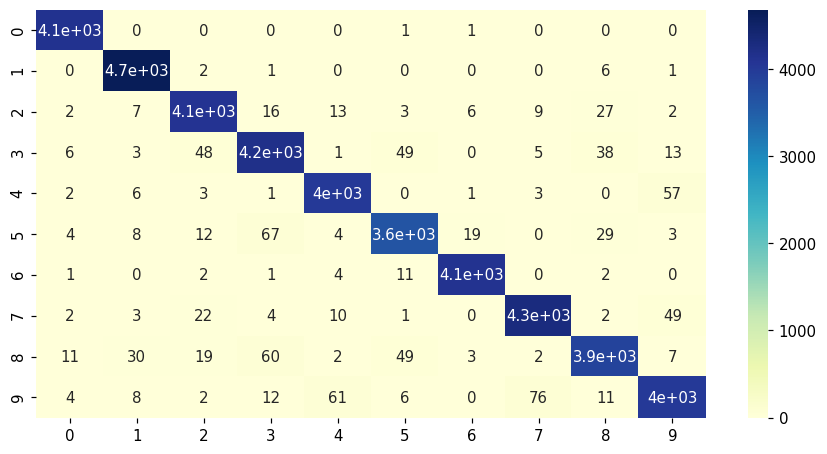

In [ ]:
# S2.3: Create a confusion matrix to check for misclassification.
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(target_train_actual, target_train_predicted)
cm_df = pd.DataFrame(cm, index = np.arange(10), columns = np.arange(10))

plt.figure(figsize = (10, 5), dpi = 108)
sns.heatmap(data = cm_df, annot = True, cmap = 'YlGnBu')
plt.show()

From the above confusion matrix, you can see that the count of the correct classification of all the digits is on the scale of $10^3$. Compared to them, misclassification counts are negligible.

Let's print the precision, recall and f1-score values to further evaluate the efficacy of the model.

In [ ]:
# S2.4: Print the precision, recall and f1-score values to further evaluate the efficacy of the model.
print(classification_report(target_train_actual, target_train_predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4132
           1       0.99      1.00      0.99      4684
           2       0.97      0.98      0.98      4177
           3       0.96      0.96      0.96      4351
           4       0.98      0.98      0.98      4072
           5       0.97      0.96      0.96      3795
           6       0.99      0.99      0.99      4137
           7       0.98      0.98      0.98      4401
           8       0.97      0.95      0.96      4063
           9       0.97      0.96      0.96      4188

    accuracy                           0.98     42000
   macro avg       0.98      0.98      0.98     42000
weighted avg       0.98      0.98      0.98     42000



The f1-scores for all the labels (or digits) are almost equal to 1. This implies that the SVC model built to classify digits is very accurate. So now let's predict the digits on the test set.

---

#### Activity 3: Prediction on Test Set^^

We already know that the test set does not have a label column. So don't need to separate the features and target variables. But we do need to normalise the features in the test set as well with the same technique used for the train set. Hence, we will divide each pixel value in the test set by 255.



In [ ]:
# S3.1: Divide each pixel value in the test set by 255. Also, for each image pixels, print the minimum and maximum pixel values.
features_test = test_df / 255.0

features_test.T.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,27960,27961,27962,27963,27964,27965,27966,27967,27968,27969,27970,27971,27972,27973,27974,27975,27976,27977,27978,27979,27980,27981,27982,27983,27984,27985,27986,27987,27988,27989,27990,27991,27992,27993,27994,27995,27996,27997,27998,27999
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,...,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,0.197099,0.199745,0.074380,0.081072,0.121519,0.113771,0.214236,0.158303,0.183628,0.118707,0.136870,0.077591,0.117272,0.210214,0.108148,0.252526,0.136004,0.039146,0.147244,0.150390,0.127426,0.061390,0.091131,0.077841,0.138140,0.081738,0.193242,0.191732,0.090331,0.126326,0.106343,0.086320,0.103832,0.132113,0.165721,0.208769,0.074765,0.118527,0.103967,0.172244,...,0.136610,0.099590,0.101981,0.047064,0.188380,0.189826,0.148584,0.203426,0.167132,0.123079,0.162965,0.188545,0.108373,0.228086,0.192647,0.212080,0.155527,0.186255,0.071614,0.154712,0.113135,0.064126,0.091302,0.123124,0.101010,0.215321,0.245863,0.178992,0.107333,0.127746,0.119898,0.191472,0.028111,0.133598,0.105197,0.131052,0.076266,0.124820,0.134029,0.179547
std,0.369479,0.365597,0.220351,0.241531,0.296426,0.279479,0.379541,0.337842,0.349905,0.285258,0.312541,0.236263,0.295937,0.384002,0.288491,0.401112,0.307736,0.175711,0.332120,0.324939,0.305720,0.219443,0.266071,0.234913,0.326848,0.244710,0.364201,0.368305,0.260420,0.311576,0.278425,0.240449,0.271415,0.308331,0.343286,0.380127,0.231971,0.293038,0.287239,0.345298,...,0.310043,0.270727,0.260843,0.189300,0.371445,0.365759,0.322418,0.369585,0.342323,0.295694,0.341330,0.364725,0.276776,0.384851,0.375320,0.395628,0.333105,0.353400,0.239672,0.332371,0.283684,0.220614,0.263967,0.297083,0.273517,0.381529,0.409249,0.357621,0.281057,0.307295,0.297305,0.367039,0.128333,0.312211,0.274100,0.310206,0.234404,0.300001,0.315047,0.352139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

Now let's predict the digits for the test set using the SVC model that we just built.

**Note:** The code below may take 3 to 5 minutes to execute.

In [ ]:
# S3.2: Predict the digits for the test set using the SVC model built above.
target_test_predicted = svc_clf_linear1.predict(features_test)
target_test_predicted

array([2, 0, 5, ..., 3, 9, 2])

Now let's get the count of the predicted labels (or handwritten digits) to see their distribution.

In [ ]:
# S3.3: Get the count of the predicted labels (or handwritten digits) to see their distribution.
pd.Series(target_test_predicted).value_counts()

1    3288
2    2882
7    2868
3    2818
0    2810
4    2808
6    2729
9    2677
8    2609
5    2511
dtype: int64

It seems that the handwritten digits in the test set are quite uniformly distributed.

---

#### Activity 4: Visualising Digits^^^

Let's now visualise at least one-one sample from each digit. But first, let's add a new column called `label` to the `test_df` data frame so that its values are the predicted labels (or digits). Make sure that the column is added to the column index = 0 location.

In [ ]:
# S4.1: Add 'label' at column index = 0 to the 'test_df' data frame so that its values are the predicted labels (or digits).
test_df.insert(loc = 0, column = "label", value = target_test_predicted)

Lets's display the first 5 rows of the modified `test_df` data frame.

In [ ]:
# S4.2: Display the first 5 rows of the modified 'test_df' data frame.
test_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now let's group all the rows of the `test_df` data frame by the `label` column so that pixel values of images of a digit can be clubbed together and a sample of a digit can be retrieved easily later.

Eg., you can easily retrieve one of the sample images of digit 0 from a data frame containing pixel values of all the image samples of the digit 0 only.

In [ ]:
# S4.3: Group all the rows of the 'test_df' data frame by the 'label' column. Also, get a data frame containing pixel values of images of digit 0.
grouped_test_df = test_df.groupby(by = "label")
zeros_test_df = grouped_test_df.get_group(0)
zeros_test_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27967,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27971,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27974,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27977,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now, let's create an image from the pixel values of one of the samples of digit 0.

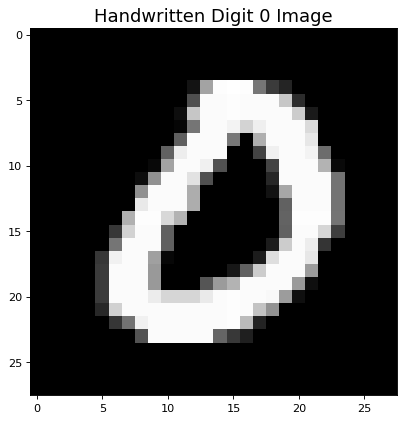

In [ ]:
# S4.4: Create an image from the pixel values of one of the samples of digit 0.
sample_of_zero_test_pixels = test_df.iloc[6, 1:].values.reshape(28, 28)

plt.figure(figsize = (6, 6), dpi = 81)
plt.title("Handwritten Digit 0 Image", fontsize = 16)
plt.imshow(sample_of_zero_test_pixels, cmap = "gray", vmin = 0, vmax = 255)
plt.show()

Indeed the predicted image is 0. Let's create an image of one of the sample images of digit three.

In [ ]:
# S4.5: Get a data frame containing pixel values of all images of digit 3 from 'grouped_test_df' data frame.
threes_test_df = grouped_test_df.get_group(3)
threes_test_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
53,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27975,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27980,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27985,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27992,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now, let's create an image of one of the sample images of digit 3.

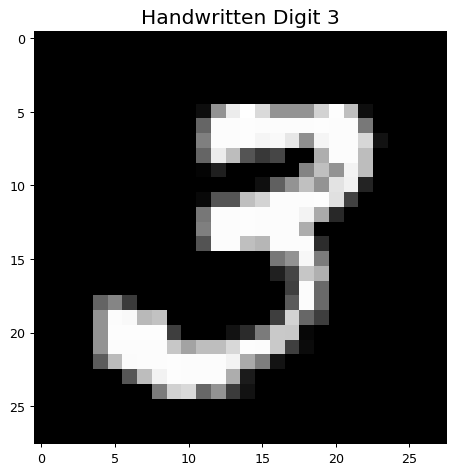

In [ ]:
# S4.6: Create an image of one of the sample images of digit 3.
sample_of_three_test_pixels = threes_test_df.iloc[4, 1:].values.reshape(28, 28)

plt.figure(figsize = (6, 6), dpi = 91)
plt.title("Handwritten Digit 3", fontsize = 16)
plt.imshow(sample_of_three_test_pixels, cmap = "gray", vmin = 0, vmax = 255)
plt.show()

You can also create a Python function to visualise exactly one sample image of each digit that exists in the `test_df` data frame. This function takes the digit as input for which one sample image needs to be created and returns the corresponding image as an output. Let's refer to this input value by the `digit_in_grouped_df` variable.

In this function:

1. Get a data frame containing the pixel values of all the images for a digit (referred to as `digit_in_grouped_df`).

2. For this digit (referred to as `digit_in_grouped_df`), get the row number of its first sample in the `test_df` data frame.

3. Create a $28 \times 28$ 2D NumPy array for the pixel values of this sample image for the digit.

4. Use the NumPy array, to create the required image.

After creating the Python function, use a for loop to generate numbers from 0 to 0 (including both) and then create one sample image that exists in the `test_df` data frame corresponding to these digits.

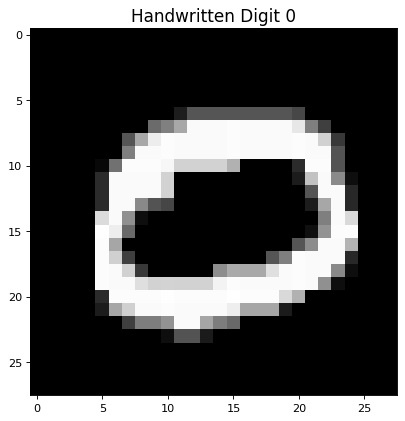

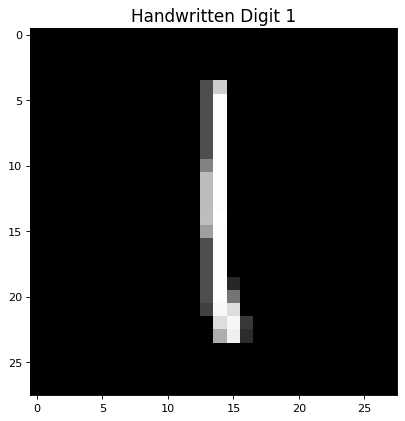

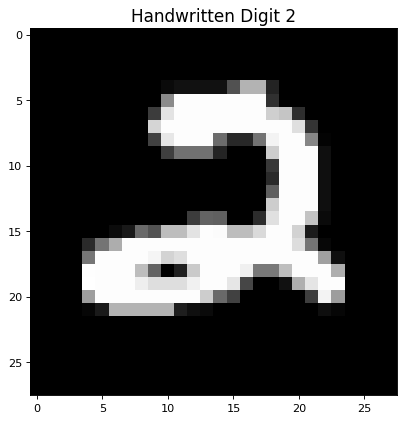

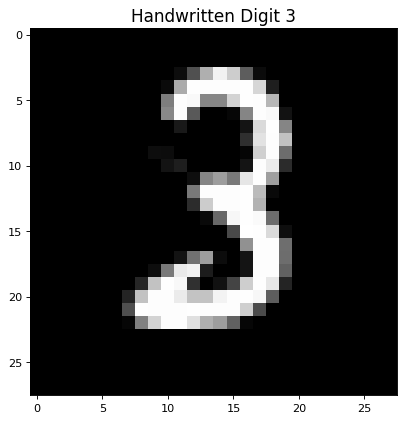

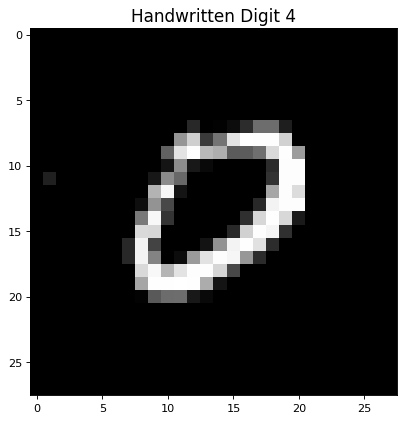

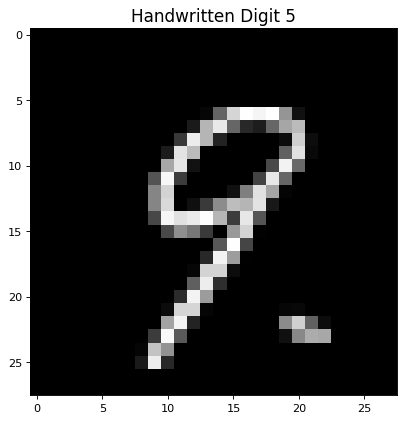

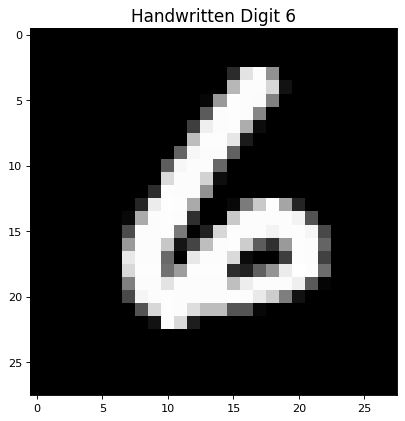

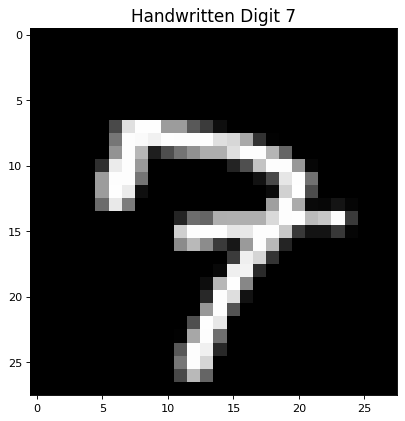

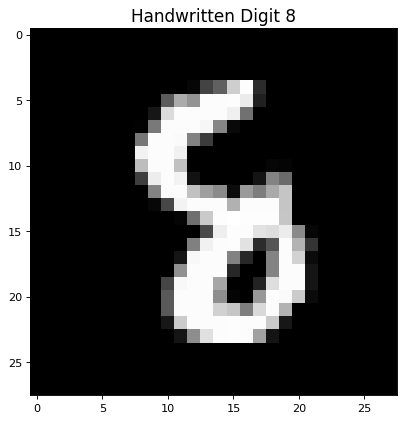

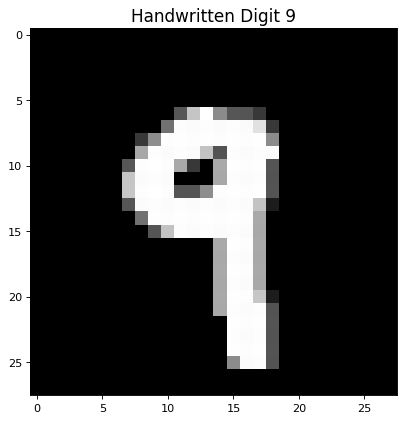

In [ ]:
# S4.7: Create a Python function to visualise exactly one sample image of a digit that exists in the 'test_df' data frame. Also, create the images.
def visualising_handwritten_digits(digit_in_grouped_test_df):
  digit_pixels_df = grouped_test_df.get_group(digit_in_grouped_test_df)
  digit_pixels_row_number = digit_pixels_df.index.values[0]
  digit_pixels_array = test_df.iloc[digit_pixels_row_number, 1:].values.reshape(28, 28)
  plt.figure(figsize = (6, 6), dpi = 81)
  plt.title(f"Handwritten Digit {digit_in_grouped_test_df}", fontsize = 15)
  plt.imshow(digit_pixels_array, cmap = "gray", vmin = 0, vmax = 255)
  plt.show()

for i in range(10):
  visualising_handwritten_digits(i)

As you can see, we have created images for one sample corresponding to each handwritten digit that exists in the `test_df` data frame.

**Note:** A couple of images may be misclassified because the prediction model that we built using the linear kernel of support vector machines is not 100% accurate. Also, we are creating the image of the first sample of a digit that exists in the `test_df` data frame. It may not be necessarily predicted correctly.

In the above code:

1. `digit_pixels_df = grouped_test_df.get_group(digit_in_grouped_test_df)` creates a data frame for all the pixel values of the images of only a particular digit (referred to as `digit_in_grouped_test_df`)

2. `digit_pixels_row_number = digit_pixels_df.index.values[0]` gets the row number for the first occurance of the pixel values of an image of a digit that exists in the `test_df`.

3. `digit_pixels_array = test_df.iloc[digit_pixels_row_number, 1:].values.reshape(28, 28)` creates a 2D NumPy array of $28 \times 28$ shape containing the pixel values of one sample image for a digt that appears first time in the `test_df` data frame.

4. ```
  plt.figure(figsize = (6, 6), dpi = 81)
  plt.title(f"Handwritten Digit {digit_in_grouped_test_df}", fontsize = 15)
  plt.imshow(digit_pixels_array, cmap = "gray", vmin = 0, vmax = 255)
  plt.show()
  ```
  creates image for the pixel values of one sample image for a digt that appears first time in the `test_df` data frame.

So this is how you can classify images using the linear kernel of an SVC model.

Let's stop here. In the next class, you will learn more about SVM.

----

### Activities

**Teacher Activities:**

1. Support Vector Machines - MNIST Image Classification II (Class Copy)

   https://colab.research.google.com/drive/1jeY6u0n011QdV5IATXmUXOM4IYNe_4Ie   
   
2. Support Vector Machines - MNIST Image Classification II (Reference)

   https://colab.research.google.com/drive/1WyS6yhvEVbFhg1TNuOXPzS_wGXfnunL7

---